In [2]:
#splitting criteria = variance
import csv
import pandas as pd
import matplotlib.pyplot as plot

df = pd.read_csv("data/DecisionTree_NewModel.csv", sep = ',', skip_blank_lines=False)
predictDf = pd.read_csv("data/Feature_Year.csv", sep = ',')
predictFutureDf = pd.read_csv("data/Predict_2018-2050.csv", sep = ',')
predictedValues = pd.read_csv("data/noGroundTruth.csv", sep=',')

In [3]:
from sklearn.ensemble import RandomForestRegressor

X = df.iloc[0:36, 2:32].values
y = df.iloc[0:36, 32].values
print(y[0])
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0, min_samples_split = 5)
regressor.fit(X,y)
test =  df.iloc[36:49,2:32]
y_pred = regressor.predict(test)
print(y_pred)
print(df.iloc[36:49,32])
print(df.iloc[36:49,1])

12860943.96
[ 2426394.55951758  2296917.89147954  2546919.20759194 16278389.62140033
 15014938.39583318 16050943.43907823  1541743.12663405 18874325.82754701
 24410479.60568875 19808787.43380212 18034789.75513852  2667058.59730869]
36     3704523.57
37       84243.75
38       11664.38
39    16422797.16
40    18958126.37
41    19566682.05
42      658062.38
43    29208756.02
44    28348898.84
45    19791086.66
46    15018631.89
47      541168.25
Name: Gift amount, dtype: float64
36    1988
37    1979
38    1970
39    2015
40    1995
41    2007
42    1983
43    1996
44    1998
45    1993
46    2006
47    1981
Name: Year, dtype: int64


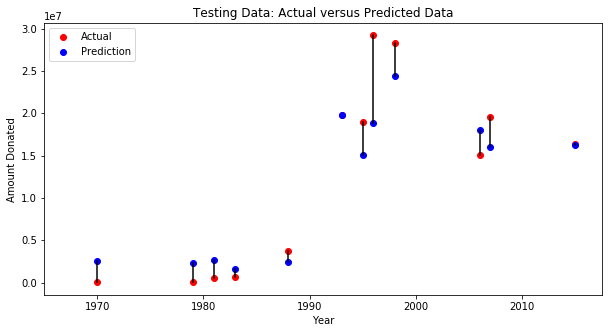

0.8700997620126478
0.07168462360999366
0.913559544391042


In [6]:
from sklearn.metrics import r2_score
from scipy import stats

xYear = df.iloc[36:49,1].values
yPredict = y_pred
yTruth = df.iloc[36:49,32].values
fig = plot.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(xYear, yTruth, c='r', label='Actual')
ax.scatter(xYear, yPredict, c='b', label='Prediction')
for i in range(len(xYear)):
    ax.plot([xYear[i], xYear[i]], [yTruth[i], yPredict[i]], color='k', linestyle='-')
plot.xlim(xmin=1965)
plot.title("Testing Data: Actual versus Predicted Data")
plot.legend(loc='upper left')
plot.xlabel("Year")
plot.ylabel("Amount Donated")
plot.show()

print(r2_score(yTruth, yPredict))
slope, intercept, r_value, p_value, std_err  = stats.linregress(yTruth, yPredict)
print(std_err)
print(r_value**2)


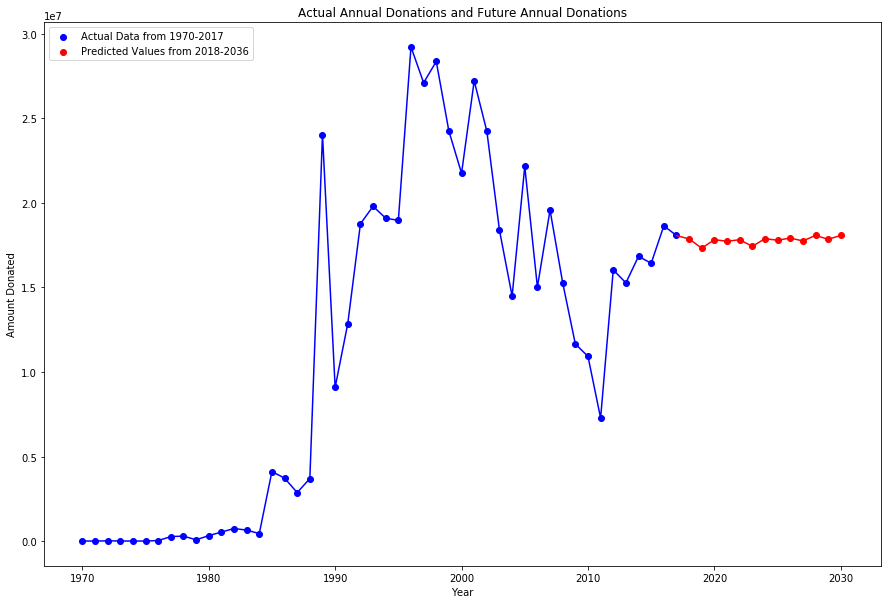

[17858458.62 17318865.79 17817022.18 17728168.98 17814312.11 17422423.69
 17879338.58 17784229.7  17915276.33 17742125.11 18072350.98 17839591.14
 18072350.98]


In [7]:
#create a line graph of actual donations from 1970-2017 and then a dashed line of predicted values from 2018-2036
yFuturePredict = predictedValues.iloc[48:61,31].values
yActuals = predictedValues.iloc[0:48,31].values
xYearActual = predictedValues.iloc[0:48,0].values
xYearPredict = predictedValues.iloc[48:61,0].values
fig = plot.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.scatter(xYearActual, yActuals, c='b', label='Actual Data from 1970-2017')
ax.scatter(xYearPredict, yFuturePredict, c='r', label='Predicted Values from 2018-2036')
#plot.plot([xYear[i], xYear[i]], [yTruth[i], yPredict[i]], color='k', linestyle='-', linewidth=2)
ax.plot(xYearActual, yActuals, color = 'b', linestyle = '-',)
ax.plot(xYearPredict, yFuturePredict, color = 'r', linestyle = '-')
ax.plot(predictedValues.iloc[47:49,0].values, predictedValues.iloc[47:49,31].values, color = 'r', linestyle = '-')
plot.title("Actual Annual Donations and Future Annual Donations")
plot.legend(loc='upper left')
plot.xlabel("Year")
plot.ylabel("Amount Donated")
plot.show()

print(yFuturePredict)

,Year,annual_unemployment,birth_rate,gdp_growth,sp500_change,total,%female,%male,female:male,%married,...,Age4%,Age5%,Age6%,Age7%,Age8%,Age9%,Age10%,Age11%,deceased%,Gift amount
0,1970,2,5,3,1,1,5,1,5,4,...,2,5,5,4,1,1,1,2,5,11664.38
1,1971,3,5,3,4,1,1,5,1,4,...,2,5,5,5,1,1,1,2,5,10535.00
2,1972,2,4,5,4,1,5,1,5,1,...,2,2,5,1,3,1,1,2,5,22200.00
3,1973,1,3,5,2,1,3,3,3,2,...,2,5,2,5,1,2,1,2,5,16500.00
4,1974,2,3,1,1,1,1,5,2,3,...,2,5,2,5,1,2,1,2,5,8300.00
5,1975,5,3,1,3,1,1,5,1,5,...,2,5,2,5,1,4,1,2,3,14000.00
6,1976,5,3,5,4,1,5,1,5,2,...,2,2,4,1,5,2,1,2,5,38275.13
7,1977,4,4,5,1,1,5,1,5,3,...,2,4,5,5,1,1,1,2,4,272787.60
8,1978,3,4,5,2,1,5,1,4,1,...,5,2,3,5,3,1,1,2,4,304766.20
9,1979,3,4,3,3,1,3,3,3,5,...,2,2,5,5,1,1,1,2,3,84243.75


In [224]:
'''knn to predict number of people who donate in a particular year'''
'''usage: data = [values of features from 1970 to 2017]. 
          frame = number of features to include for label and number of neighbors 
          year = year desired to predict for data using kNR (k- nearest regression)'''
from sklearn.neighbors import KNeighborsRegressor as kNN
decadeData = []
toPredictArray = []

def genFeatureDict(data, frame): 
    featureDict = []
    x = frame
    for x in range(frame, len(data)):
        valuesArray = [data[x]]
        for y in range(x-frame, x):
            valuesArray.append(data[y])
        featureDict.append(valuesArray)
    return featureDict

def generateFeaturesLabels(dictionary, frame): 
    labels = []
    features = []
    for x in dictionary:
        labels.append(x[0])
        features.append(x[1:])
    return features, labels

def generateToPredictArray(dictionary, year, frame):
    year1 = year + 1
    for x in range(year-frame, year):
        outputArray.append(dictionary)

def predictValueForFutureYear(data, frame, year):
    if frame <= 2: 
        print("frame must be greater than 2")
        return
    generatedData = data[:]
    x = 2018 + len(data) - 48
    featureDict = genFeatureDict(generatedData, frame)
    features, labels = generateFeaturesLabels(featureDict, frame)
    while x <= year:
        model = kNN(n_neighbors = 4)
        model.fit(features, labels)
        toPredictArray = generatedData[-(frame):]
        prediction = int(model.predict([toPredictArray]))
        generatedData.append(prediction)
        featureDict = genFeatureDict(generatedData, frame)
        features, labels = generateFeaturesLabels(featureDict, frame)
        x += 1
    return generatedData, prediction

def evaluateModel(data):
    featureArray = genFeatureDict(data, 10)
    actualValues = data[:]
    predictedValues = []
    alreadyProcessed = []
    toBeEliminated = []
    while featureArray:
        toBeEliminated = featureArray.pop(0)
        features, labels = generateFeaturesLabels(alreadyProcessed + featureArray, 10)
        model = kNN(n_neighbors = 4)
        model.fit(features, labels)
        predictedValues.append(float(model.predict([toBeEliminated[1:]])))
        alreadyProcessed.append(toBeEliminated)
    slope, intercept, r_valueSquared, p_value, std_err = statistics(predictedValues, actualValues[10:])
    return r_valueSquared, std_err, actualValues, predictedValues

d1 = predictDf.iloc[0:48,27]
decadeData = d1.values.tolist()
print(decadeData)

generatedData, prediction = predictValueForFutureYear(decadeData, 10, 2018)
print("!!!")
print(generatedData)
print(prediction)
#r_valueSquared, std_err, actualValues, predictedValues = evaluateModel(decadeData)

#print(r_valueSquared)
#print(std_err)
#plot.scatter(actualValues[10:], predictedValues)

[1.0, 1.0, 1.0, 2.0, 2.0, 4.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 3.0, 3.0, 4.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 3.0, 4.0, 5.0, 5.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 5.0, 4.0]
!!!
[1.0, 1.0, 1.0, 2.0, 2.0, 4.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 3.0, 3.0, 4.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 3.0, 4.0, 5.0, 5.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 5.0, 4.0, 4]
4
